In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')


In [18]:
#load the data
df = pd.read_csv("../Data/nba-stats-first2seasons.csv")

In [19]:
df.shape

(1325, 75)

In [20]:
df = df.dropna().reset_index(drop=True)

In [21]:
df.shape

(1065, 75)

In [22]:
df.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Player', 'G', 'GS', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'],
      dtype='object')

In [23]:
df.describe()

,Age,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,BLK_diff,BLK_avg,TOV_diff,TOV_avg,PF_diff,PF_avg,PTS_diff,PTS_avg,all_star,rising_star
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,...,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,22.063850,49.143662,15.518310,16.335775,2.243192,5.261315,1.825822,3.970329,0.418779,1.289484,...,0.000939,0.312207,0.035117,1.037089,0.023474,1.654460,0.063286,6.585540,0.104225,0.172770
std,2.076465,23.770421,22.538686,8.107771,1.474098,3.202951,1.333539,2.734983,0.448854,1.221026,...,0.222298,0.351081,0.533173,0.643570,0.675910,0.730557,3.521872,4.185644,0.305696,0.378226
min,18.000000,2.000000,0.000000,2.800000,0.000000,0.700000,0.000000,0.300000,0.000000,0.000000,...,-1.100000,0.000000,-3.000000,0.050000,-2.300000,0.000000,-13.500000,0.350000,0.000000,0.000000
25%,21.000000,29.000000,0.000000,10.000000,1.200000,3.000000,0.900000,2.000000,0.100000,0.300000,...,-0.100000,0.100000,-0.300000,0.600000,-0.400000,1.100000,-2.000000,3.500000,0.000000,0.000000
50%,22.000000,51.000000,4.000000,15.300000,1.800000,4.400000,1.400000,3.200000,0.300000,1.000000,...,0.000000,0.200000,0.000000,0.900000,0.000000,1.600000,0.000000,5.500000,0.000000,0.000000
75%,23.000000,72.000000,22.000000,21.400000,3.000000,6.800000,2.400000,5.200000,0.600000,2.000000,...,0.100000,0.400000,0.400000,1.300000,0.400000,2.150000,2.000000,8.450000,0.000000,0.000000
max,35.000000,82.000000,82.000000,39.700000,8.600000,18.900000,8.600000,16.500000,2.500000,7.100000,...,1.500000,2.500000,2.300000,4.300000,2.300000,4.150000,12.000000,24.950000,1.000000,1.000000


'Season', 'Age', 'Tm', 'Lg', 'Player', 'G', 'GS', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'

In [25]:
print(df['all_star'].value_counts())

0    954
1    111
Name: all_star, dtype: int64


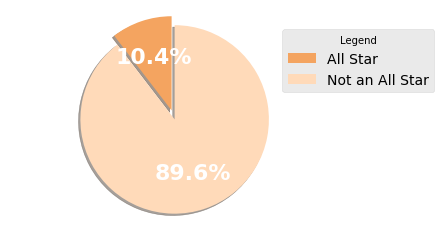

In [28]:
# plotting original data
labels = 'All Star', 'Not an All Star'
btc_1 = [sum(df.all_star), (df.all_star == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['sandybrown', 'peachpuff']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()


f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.overview_len, ax = ax[0], color='skyblue')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=train.overview_len, kde = False, ax = ax[1], color='skyblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(train.overview_len), kde = False, ax = ax[2], color='skyblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

#### Bivariate Analysis

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['overview_len'], train['revenue'], color='skyblue')
plt.title('Revenue vs overview_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['overview_len']), np.log1p(train['revenue']), color='skyblue')
plt.title('Log Revenue vs log overview_len');

#calculate Pearson's correlation
corr, _ = pearsonr(train['overview_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)